<a href="https://colab.research.google.com/github/gunhokim-me/kaggle_Study/blob/master/Cost_of_Living_Index_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
test = pd.read_csv("/content/Cost_of_Living_Index_2022.csv")
test.head()


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [48]:
test2 = test.groupby(['Country'], as_index=False).mean()
test2.head()

,Country,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,1.0,20.37,2.72,12.09,14.92,12.41,23.04
1,Albania,2.0,35.50,8.47,22.83,29.32,25.82,30.19
2,Algeria,3.0,26.87,4.59,16.43,28.82,14.48,24.63
3,Argentina,4.0,34.69,7.71,22.04,28.17,33.32,30.72
4,Armenia,5.0,33.89,11.61,23.45,27.59,30.55,28.86


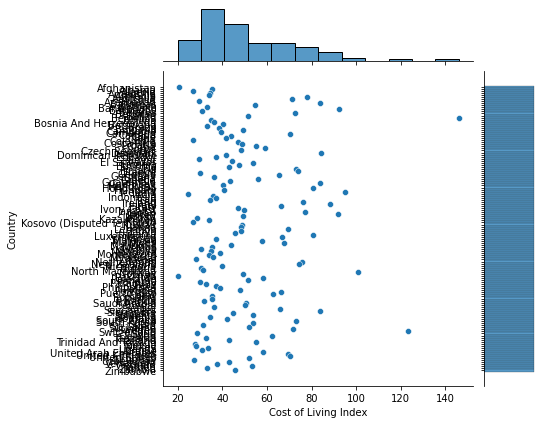

In [49]:
sns.jointplot(x='Cost of Living Index', y='Country', data=test2)

In [45]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB
None


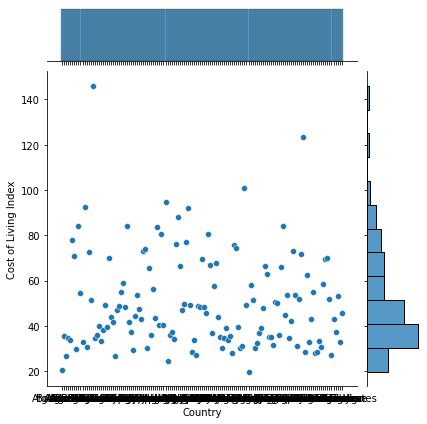

In [41]:
sns.jointplot(x='Country', y='Cost of Living Index', data=test)

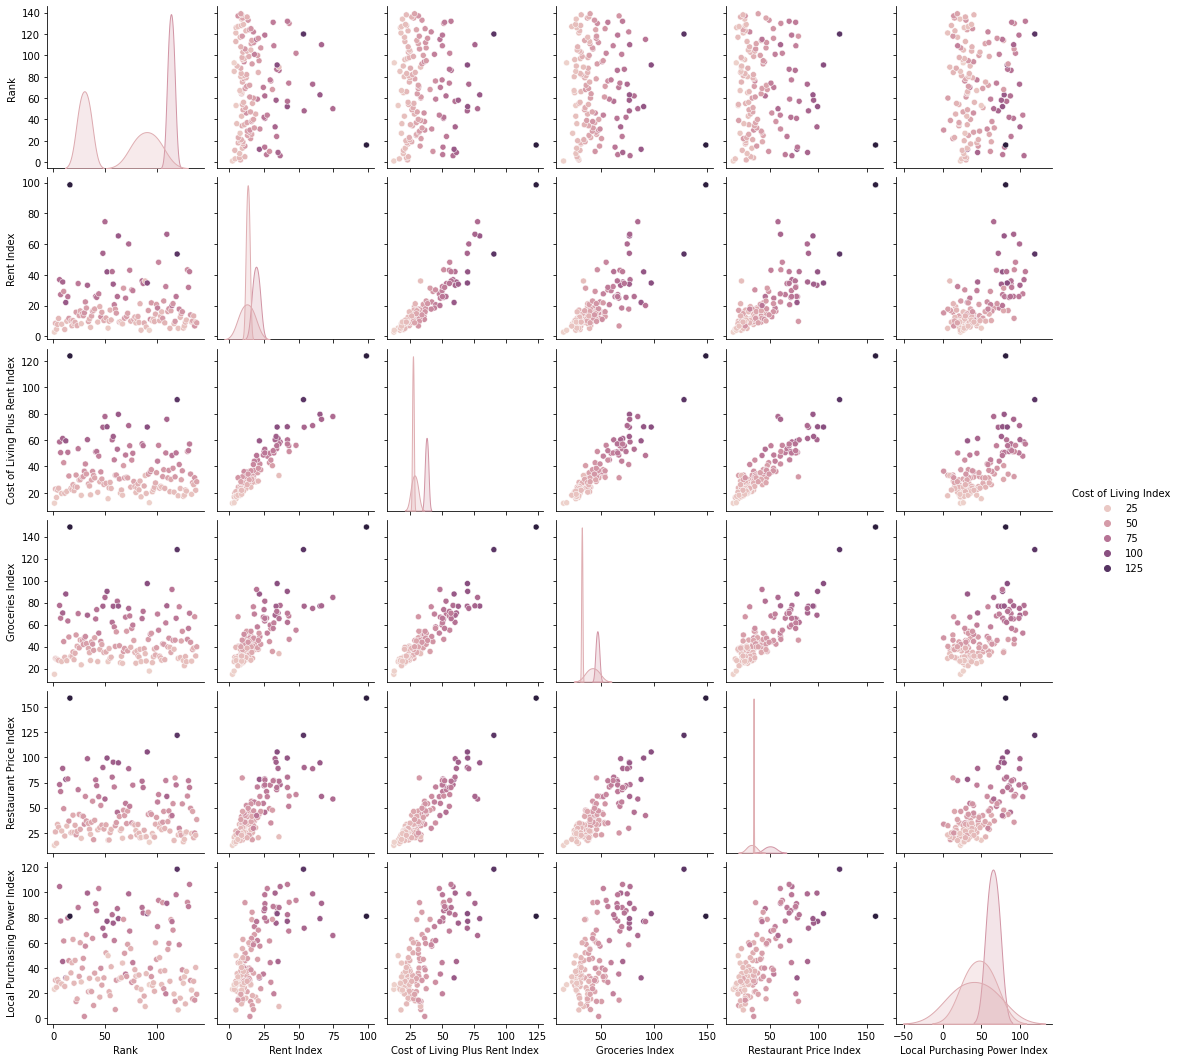

In [50]:
sns.pairplot(test2, hue='Cost of Living Index')

In [51]:
test2.corr()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1.000000,-0.058682,-0.022347,-0.046217,-0.014720,-0.066568,0.001868
Cost of Living Index,-0.058682,1.000000,0.838079,0.974752,0.965435,0.934505,0.687244
Rent Index,-0.022347,0.838079,1.000000,0.938735,0.799108,0.800190,0.638075
Cost of Living Plus Rent Index,-0.046217,0.974752,0.938735,1.000000,0.936967,0.917878,0.695304
Groceries Index,-0.014720,0.965435,0.799108,0.936967,1.000000,0.851450,0.626534
Restaurant Price Index,-0.066568,0.934505,0.800190,0.917878,0.851450,1.000000,0.690833
Local Purchasing Power Index,0.001868,0.687244,0.638075,0.695304,0.626534,0.690833,1.000000


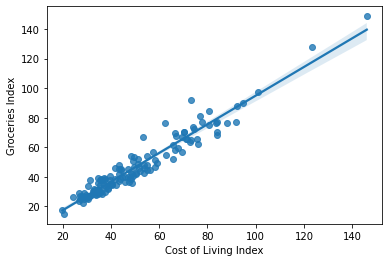

In [52]:
select_columns = test2[['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
sns.regplot(x='Cost of Living Index', y='Groceries Index', data=select_columns)

In [53]:
X = select_columns[['Groceries Index']]
y = select_columns['Cost of Living Index']
from sklearn.model_selection import train_test_split # 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression( )
model.fit(X_train, y_train)
print('추세선의 기울기 : ', model.coef_) # 추세선의 기울기와 y절편
print('추세선의 y절편 : ', model.intercept_)

추세선의 기울기 :  [0.95666954]
추세선의 y절편 :  5.585299103292854


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[]

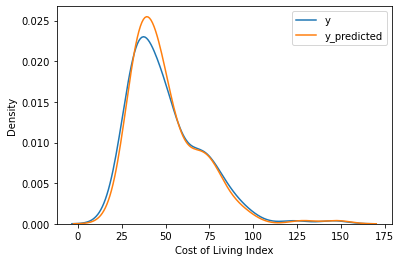

In [55]:
y_predicted = model.predict(X)
sns.distplot(y, hist = False, label = 'y')
sns.distplot(y_predicted, hist = False, label = 'y_predicted')
plt.legend( )
plt.plot( )

In [56]:
X1 = pd.DataFrame([10, 20, 500])
model.predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 15.15199451,  24.71868992, 483.9200694 ])